Areas to be Covered:

- Vectorized, Fast array operations
- Common array algo (like sorting)
- Efficint descriptive/summaritive data
- Data alignment, merging/joining datasets
- Expressing conditional logics
- Group-wise data manipulation

Numpy is very efficient in dealing with large scale of data:

In [1]:
# Time difference experience
import numpy as np

my_arr = np.arange(1000000)
my_list = list(range(1000000))

% time for _ in range(10): my_arr2 = my_arr * 2
% time for _ in range(10): my_list2 = my_list * 2
    
# Usually numpy is 100 times faster than basic objects in Python and use less memory

Wall time: 20.9 ms
Wall time: 194 ms


In [2]:
# Using ndarray

data1 = [[2,5,6,8,9],[3,5,7,3,6]]
arr1 = np.array(data1)
arr1.shape
arr1.ndim

# Creating zero and one arrays
data_zero = np.zeros((10, 5))
data_one = np.ones((3,4)) # Remember to use tuple! 

# Creating range of value array
data_range = np.arange(1,5,2) # from 1 to 5 excluding 5, by the step of 2

In [3]:
# Specifying data_type

arr1 = np.array([1,2,3], dtype = np.int32) # or np.float64
arr1.dtype

# Change data_type

arr2 = arr1.astype(np.float64) # alternatively, can specify np.string_
arr2

array([1., 2., 3.])

### Arithmetic with Numpy Array

Numpy Array enable expression of batch operations on data without using loop. This is called __vectorization__.

In [4]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr * arr # This is elemental wise multiplication
arr ** 0.5 # Also elemental wise

arr2 = arr ** 2
arr2 > arr1 # Elemental wise comparison

array([[False,  True,  True],
       [ True,  True,  True]])

### Basic Indexing and Slicing

In [5]:
# Indexing on single dimension array

# Note: Slicing DO NOT COPY the original array

arr = np.arange(10)
arr_slice = arr[1:4]

arr[3] = 10000
arr_slice # Note that any change on the original array is transported directly to the slice. As arr_slice is not a created copy

# Indexing Multi-dimension array
arr = np.array([[1,2,3], [4,5,6], [7,8,9]])
arr[2][1] # Index the row and then the column
arr[2,1] # This also works similarly!

8

In [6]:
# Boolean Indexing

# Note: Boolean indexing always create a COPY of the data

name = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7,4)

name == 'Bob'
data[name == 'Bob'] # This is as if selecting just rows corresponding to when Bob appeared in name
data[name == 'Bob',2:] 
data[name != 'Bob',1:]

condition = name == 'Joe' # Can create condition explicitly as well! 
data[~condition] # ~ is also a negate sign, but can be used to invert a general condition

# Boolean Condiiton:    '|' is 'or', '&' is 'and'
condition2 = (name == 'Bob') | (name == 'Joe')  # Can create joint condition as well!
data[~condition2]

data[data < 0] = 99  # Selecting by conditioning oneself
data


array([[9.90000000e+01, 5.90306281e-01, 9.16003713e-01, 9.90000000e+01],
       [5.51932723e-01, 9.90000000e+01, 2.17403700e+00, 4.88838097e-01],
       [4.61557033e-01, 2.28803974e-01, 2.69361966e-01, 1.55107224e+00],
       [4.08145471e-01, 9.90000000e+01, 5.02190527e-02, 1.47223696e+00],
       [9.90000000e+01, 1.05224065e+00, 9.90000000e+01, 9.90000000e+01],
       [7.15941506e-02, 9.90000000e+01, 9.90000000e+01, 9.90000000e+01],
       [9.90000000e+01, 9.90000000e+01, 9.90000000e+01, 2.60301127e-01]])

In [7]:
# Fancy Indexing

# Do COPY the original array

arr = np.empty((8,4))
for i in range (8):
    arr[i,:] = i

arr[[4,3,0,6]] # Selects the 4th, 3rd, 0th, and 6th row
arr[[-1,-3,-5]] # Select the 1st, 3rd, and 5th last row

arr2 = np.arange(32)
arr2 = arr2.reshape(8,4)
arr2[[1,3],[3,2]] # Will select (1,3), (3,4) two indexed numbers


array([ 7, 14])

In [8]:
# Transposing Arrays and Swapping Axes

arr.T # Transpose the array, which the simplest of swapping 2 axes
np.dot(arr, arr.T)


arr = arr.reshape(2,4,4)
arr.transpose(1,0,2) # Basically having the second axes first, then first, finally the 3rd unchanged

array([[[0., 0., 0., 0.],
        [4., 4., 4., 4.]],

       [[1., 1., 1., 1.],
        [5., 5., 5., 5.]],

       [[2., 2., 2., 2.],
        [6., 6., 6., 6.]],

       [[3., 3., 3., 3.],
        [7., 7., 7., 7.]]])

### Universal Functions

Universal function is a function that perform element wise operations on ndarray of data. Can be thought of fast vectorized wrapper. 

* Eg. Exp(), Sqrt() -> Unary functions
* Eg. Add, Subtract -> Binary functions

### Array-Oriented Programming

Vectorization, which replaces explicit loops, are one of the most powerful to increase computational efficiency

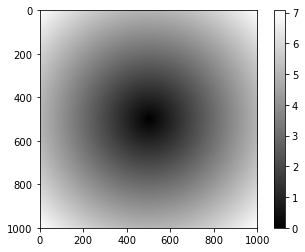

In [9]:
# Supporse we want to evaluate (x^2 + y^2)^(1/2)

points = np.arange(-5,5,0.01)
xs, ys = np.meshgrid(points, points) # Takes two 1d matrix, and produces 2 2d matrix corresponding to all pairs of (x,y)

z = np.sqrt(xs**2 + ys**2)

import matplotlib.pyplot as plt
plt.imshow(z, cmap = plt.cm.gray)
plt.colorbar()
plt.show()

### Conditional Logic as Array Operationals

In [10]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5]) + 1
cond = np.array([True, False, True, True, False])

result = np.where(cond, xarr, yarr) # If condition is true, xarr, else, yarr
result2 = np.where(arr > 0, 1,-1)

### Mathematical and Statistical Analysis

In [11]:
arr.mean(axis = 1)
arr.cumsum()

(arr > 0).sum() # Number of True values

(arr > 0).any() # Check if ANY of the conditions are true
(arr > 0).all() # Check of ALL of the conditions are true

A = np.array([1,2,32,3])
A.sort()
A

array([ 1,  2,  3, 32])

### Unique and other Set Logic

In [12]:
np.unique(name) # Gives the unique values in an ndarray

values = np.array([2,3,4,5,2,3,4,7,8])
np.in1d(values, [2,3,4]) # Test the membership of the selected values

array([ True,  True,  True, False,  True,  True,  True, False, False])

### File Input and Output with Arrays

In [13]:
np.save('Array_example', arr) # Use np.save directly, by specifying file name, and the ndarray
C = np.load('Array_example.npy') # Load data using extension .NPY

### Linear Algebra

In [14]:
x = np.array([[1., 5., 3.], [4., 10., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

# Note that: * opetation is element wise multiplication

C = x.dot(y)
x@y # This is equivalent to matrix multiplciation

from numpy.linalg import inv, qr   # linalg is IMPORTANT library to use for all linear algebra operations

inv(C) 
q, r = qr(C) # QR decompositions, where r is the upper right triangular matrix

### Pesudo-Random Number Generation

In [19]:
np.random.seed(1234)
ran_gen = np.random.RandomState(1234) # This ensures that the random state is isolated, not GLOBAL

samples = ran_gen.normal(size =(4,4))
samples_2 = ran_gen.randn(4,4)
samples_2

array([[ 0.40545341,  0.28909194,  1.32115819, -1.54690555],
       [-0.20264632, -0.65596934,  0.19342138,  0.55343891],
       [ 1.31815155, -0.46930528,  0.67555409, -1.81702723],
       [-0.18310854,  1.05896919, -0.39784023,  0.33743765]])